# MEC LSI

## Init the MEC environment

In [1]:
from IPython.core.display import display, HTML
import nbimporter
from mecdb import MEC
import sklearn.cluster as cls
import numpy as np


def show(doc, w=120):
    style = 'width: ' + str(w) + 'px;'
    try:
        url = doc['image']
    except KeyError:
        url = 'https://cdn0.iconfinder.com/data/icons/large-glossy-icons/512/No.png'
    display(HTML('<img src="' + url + '" style="' + style + '">'))

    
def show_grid(docs, w=120, row=6):
    style = 'width: ' + str(w) + 'px; display: inline;'
    html_row = []
    for doc in docs:
        try:
            url = doc['image']
        except KeyError:
            url = 'https://cdn0.iconfinder.com/data/icons/large-glossy-icons/512/No.png'
        html_row.append('<img src="' + url + '" style="' + style + '">')
        if len(html_row) == row:
            display(HTML("".join(html_row)))
            html_row = []
    display(HTML("".join(html_row)))
    
def data_to_table(D):
    row = "<th>DocId</th><th>Tokens</th>"
    table = "<table><tr>"+row+"</tr>"
    for i, doc in enumerate(D):
        row = "<tr><td>" + str(i) + "</td><td>"+" ".join(doc)+'</td>'+"</tr>"
        table += row
    table += '</table>'
    return table 

def near_tables(t1, t2):
    p = "<style>table,td,tr,th {border:none!important} th {border-bottom:solid!important}</style>"
    p += "<table><tr><td style='vertical-align: top;'>"
    p += t1 + "</td><td style='vertical-align: top;'>"
    p += t2 + "</td></tr></table>"
    return p

def to_table(tokens, M, rnd=3, bold_th=0.0):
    row = "<th></th>" + "".join(['<th style="text-align: center;">'+str(x)+'</th>' for x in range(0, M.shape[1])])
    table = "<table><tr>"+row+"</tr>"
    for i, token in enumerate(M):
        cells = []
        for x in token:
            if x > bold_th:
                s = "font-weight: bold; background-color: #eeee00;"
            else:
                s = "font-weight: normal;"
            cell = '<td style="text-align: center; '+s+'">'+str(round(x, rnd))+'</td>'
            cells.append(cell)
        row = "<tr><td style='text-align: right;'>" + tokens[i] + "</td>"+"".join(cells)+"</tr>"
        table += row
    table += '</table>'
    return table


dataset = 'calzedoniajson_items_0'
mec = MEC(dataset)

Importing Jupyter notebook from mecdb.ipynb


In [2]:
import numpy as np

M = mec.dataset_matrix(size=len(mec.dictionary))
tags = [t for t, i in sorted(mec.dictionary.items(), key=lambda x: x[1])]
T = M.T

In [3]:
U, s, VT = np.linalg.svd(T, full_matrices=False)
Sigma = np.diag(s)
print 'original shape', T.shape
print 'U shape', U.shape
print 'Sigma shape', Sigma.shape
print 'VT shape', VT.shape

original shape (694, 450)
U shape (694, 450)
Sigma shape (450, 450)
VT shape (450, 450)


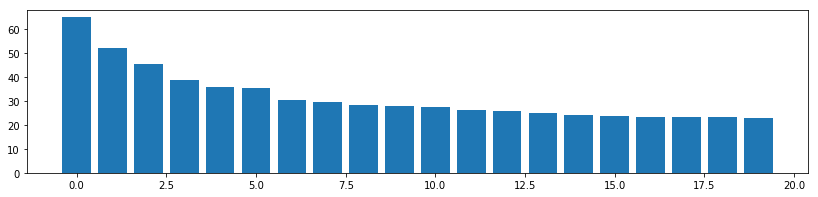

In [4]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 3))
axes.bar(range(0, 20), s[:20])
plt.show()

In [5]:
K = 10
sk = s[:K]
Uk = U[:,:K]
VTk = VT.T[:,:K].T
Tred = np.dot(np.dot(Uk, np.diag(sk)), VTk)

In [7]:
tk1, tk2 = to_table(tags, Uk, bold_th=10), to_table([str(i) for i in range(0, len(M))], VTk.T, bold_th=10)
display(HTML(near_tables(tk1, tk2)))

,0,1,2,3,4,5,6,7,8,9
Christmas,-0.017,0.015,0.052,-0.027,0.023,-0.123,0.007,0.134,0.091,0.074
Halloween,-0.005,0.005,0.0,-0.006,-0.002,0.005,-0.006,0.003,0.01,0.001
Luna,-0.002,0.001,0.009,-0.001,0.0,-0.006,0.003,0.008,-0.001,0.015
New Year,-0.002,0.003,0.016,-0.004,0.006,-0.037,0.008,0.063,0.044,0.053
Pilate,-0.005,-0.001,-0.003,0.015,0.066,0.007,-0.006,-0.003,-0.0,0.014
World Wide Web,-0.001,0.002,0.017,0.012,-0.004,0.012,0.003,-0.018,0.011,0.0
abstract,-0.012,0.022,0.152,0.074,-0.021,0.024,0.001,-0.011,0.013,0.056
accessory,-0.018,0.022,0.051,-0.043,0.013,-0.15,-0.039,-0.124,-0.033,0.038
accident,-0.002,0.002,0.001,-0.01,0.003,0.005,0.026,-0.003,-0.013,-0.005
accomplishment,-0.001,0.002,0.016,0.011,-0.003,0.01,0.002,-0.015,0.004,0.0


In [8]:
Terms = np.dot(Uk, np.diag(sk))
Docs = np.dot(np.diag(sk), VTk)

tk3, tk4 = to_table(tags, Terms, bold_th=100), to_table([str(i) for i in range(0, len(M))], Docs.T, bold_th=100)
display(HTML(near_tables(tk3, tk4)))

,0,1,2,3,4,5,6,7,8,9
Christmas,-1.084,0.759,2.357,-1.048,0.845,-4.335,0.204,3.946,2.559,2.065
Halloween,-0.296,0.249,0.021,-0.215,-0.078,0.183,-0.183,0.082,0.269,0.016
Luna,-0.106,0.067,0.411,-0.047,0.001,-0.22,0.099,0.247,-0.034,0.424
New Year,-0.139,0.169,0.705,-0.174,0.229,-1.303,0.241,1.867,1.225,1.482
Pilate,-0.34,-0.034,-0.15,0.588,2.363,0.25,-0.174,-0.083,-0.002,0.387
World Wide Web,-0.059,0.109,0.777,0.461,-0.133,0.422,0.101,-0.538,0.299,0.013
abstract,-0.783,1.143,6.92,2.893,-0.744,0.857,0.045,-0.332,0.354,1.562
accessory,-1.172,1.169,2.305,-1.659,0.458,-5.296,-1.179,-3.654,-0.921,1.055
accident,-0.121,0.097,0.053,-0.37,0.093,0.169,0.788,-0.089,-0.357,-0.145
accomplishment,-0.061,0.112,0.732,0.422,-0.121,0.346,0.05,-0.446,0.123,0.005


topic 0
woman, sexy, fashion, pretty, girl, young, glamour, model, beautiful, summer
topic 1
vacation, beach, sea, water, sand, ocean, travel, tropical, summer, leisure
topic 2
text, business, design, desktop, symbol, no person, education, sign, illustration, success
topic 3
lingerie, erotic, pantie, seduction, brassiere, people, thin, underwear, wear, one
topic 4
exercise, active, strength, fitness, sport, health, brawny, gymnastics, athlete, balance
topic 5
color, thread, no person, textile, bright, decoration, gift, fabric, accessory, celebration
topic 6
street, cute, festival, man, music, city, performance, pantie, people, attractive
topic 7
illustration, character, funny, art, far-out, sketch, simple, scribble, celebration, cockamamie
topic 8
footwear, person, shoe, foot, attractive, funny, character, sneakers, contemporary, beautiful
topic 9
indoors, family, festival, music, performance, furniture, concert, light, sofa, room


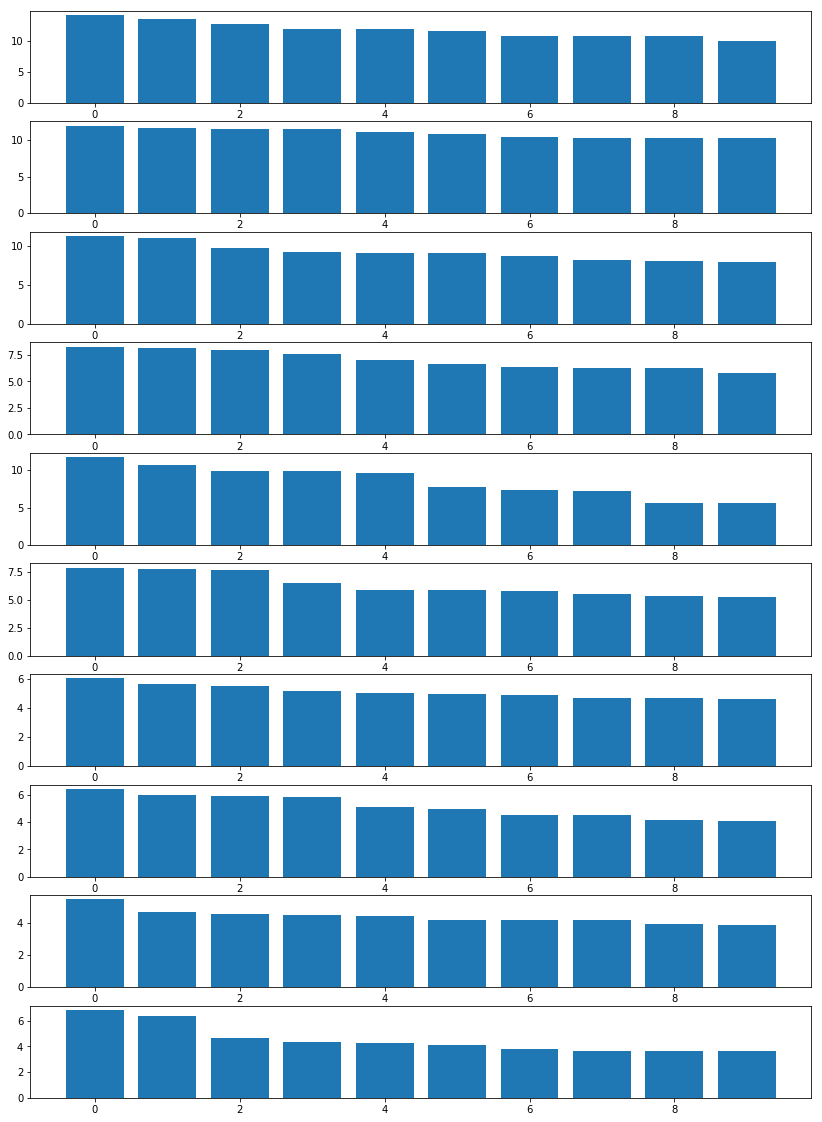

In [9]:
fig, axes = plt.subplots(nrows=K, ncols=1, figsize=(14, 20))

k_tags = 10
for j, row in enumerate(Terms.T):
    t_i = [(i, np.abs(x)) for i, x in sorted(enumerate(row), 
                                key=lambda k: -np.abs(k[1]))]
    print 'topic', j
    print ", ".join([tags[x[0]] for x in t_i[:k_tags]])
    axes[j].bar(range(0, 10), [x[1] for x in t_i[:k_tags]])
    
plt.show()
    

In [10]:
k_imgs = 10
for j, row in enumerate(Docs):
    i_i = [(i, np.abs(x)) for i, x in sorted(enumerate(row), 
                                key=lambda k: -np.abs(k[1]))]
    print 'topic', j
    print show_grid([mec.docs[x[0]] for x in i_i[:k_imgs]])



topic 0


None
topic 1


None
topic 2


None
topic 3


None
topic 4


None
topic 5


None
topic 6


None
topic 7


None
topic 8


None
topic 9


None
